In [26]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np


In [27]:
def ForwardEulerSolver(i_initial, s_initial, Beta, Gamma, tRange, step_size):
    
    s = [s_initial]
    i = [i_initial]
    
    t = [0]
    
    # Find number of steps until you reach tRange and loop through them
    for n in range(int(tRange / step_size)):
        
        ds = - Beta * s[n] * i[n] + Gamma * i[n]
        s_nPlusOne = s[n] + step_size * ds
        s.append(s_nPlusOne)
        
        di = Beta * s[n] * i[n] - Gamma * i[n]
        
        i_nPlusOne = i[n] + step_size * di
        i.append(i_nPlusOne)
        
        t_nPlusOne = t[n] + step_size
        t.append(t_nPlusOne)
        
    i = np.array(i)
    t = np.array(t)
    return [t,i]

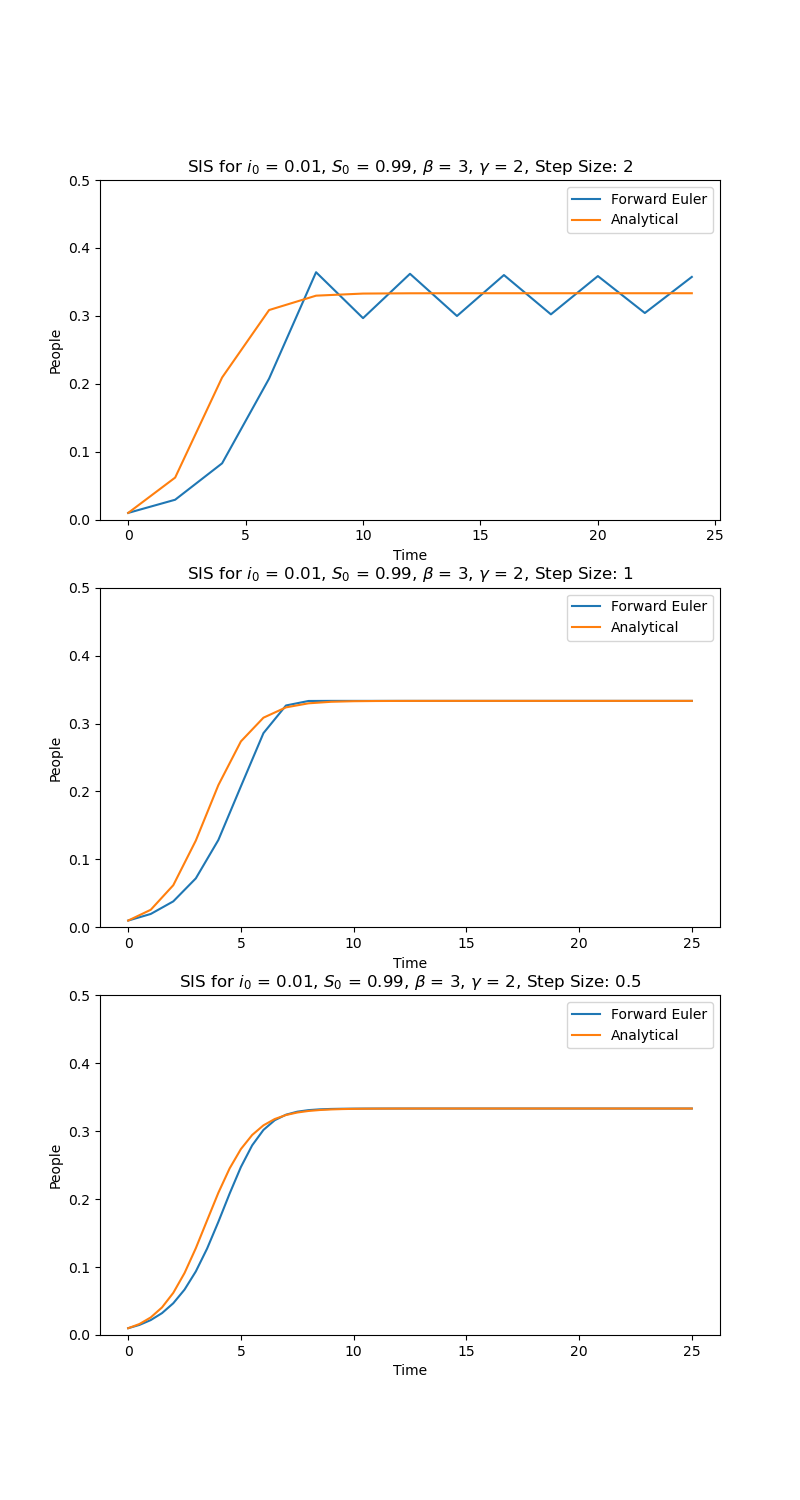

In [28]:
# Problem A
fig, axs = plt.subplots(3, figsize=(8, 15))



i_initial = 0.01
s_initial = 0.99

Beta = 3
Gamma = 2
t_range = 25
One_Over_R_naught = Gamma / Beta

step_size = 2

t0,I0 = ForwardEulerSolver(i_initial, s_initial, Beta, Gamma, t_range, step_size)

i_analytical = ((1-One_Over_R_naught) /
                    (1+((1-One_Over_R_naught-i_initial)/i_initial)*np.e**(-(Beta-Gamma)*t0))
               )

axs[0].cla()
axs[0].plot(t0, I0, label='Forward Euler')
axs[0].plot(t0, i_analytical, label='Analytical')
axs[0].set_xlabel("Time")
axs[0].set_ylabel("People")
axs[0].legend()
axs[0].set_title("SIS for $i_0$ = 0.01, $S_0$ = 0.99, $\u03B2$ = 3, $\u03B3$ = 2, Step Size: 2")
axs[0].set_ylim(0,0.5)

step_size = 1

t0,I0 = ForwardEulerSolver(i_initial, s_initial, Beta, Gamma, t_range, step_size)
i_analytical = ((1-One_Over_R_naught) /
                    (1+((1-One_Over_R_naught-i_initial)/i_initial)*np.e**(-(Beta-Gamma)*t0))
               )
axs[1].cla()
axs[1].plot(t0, I0, label='Forward Euler')
axs[1].plot(t0, i_analytical, label='Analytical')
axs[1].set_xlabel("Time")
axs[1].set_ylabel("People")
axs[1].legend()
axs[1].set_title("SIS for $i_0$ = 0.01, $S_0$ = 0.99, $\u03B2$ = 3, $\u03B3$ = 2, Step Size: 1")
axs[1].set_ylim(0,0.5)

step_size = 0.5

t0,I0 = ForwardEulerSolver(i_initial, s_initial, Beta, Gamma, t_range, step_size)
i_analytical = ((1-One_Over_R_naught) /
                    (1+((1-One_Over_R_naught-i_initial)/i_initial)*np.e**(-(Beta-Gamma)*t0))
               )
axs[2].cla()
axs[2].plot(t0, I0, label='Forward Euler')
axs[2].plot(t0, i_analytical, label='Analytical')
axs[2].set_xlabel("Time")
axs[2].set_ylabel("People")
axs[2].legend()
axs[2].set_title("SIS for $i_0$ = 0.01, $S_0$ = 0.99, $\u03B2$ = 3, $\u03B3$ = 2, Step Size: 0.5")
axs[2].set_ylim(0,0.5)

plt.savefig('problem1Graphs.png')

In [29]:
# Problem C
# Function that uses both Forward Euler and analytical solution
# Then finds E, the maximum absolute error
def get_max_error(i_initial, s_initial, Beta, Gamma, t_range, step_size):
    t0,I0 = ForwardEulerSolver(i_initial, s_initial, Beta, Gamma, t_range, step_size)
    i_analytical = ((1-One_Over_R_naught) /
                    (1+((1-One_Over_R_naught-i_initial)/i_initial)*np.e**(-(Beta-Gamma)*t0))
                   )
    return max(abs(I0 - i_analytical))


i_initial = 0.01
s_initial = 0.99

Beta = 3
Gamma = 2
t_range = 25
step_size = 2
get_max_error(i_initial, s_initial, Beta, Gamma, t_range, step_size)

0.1263393498870075

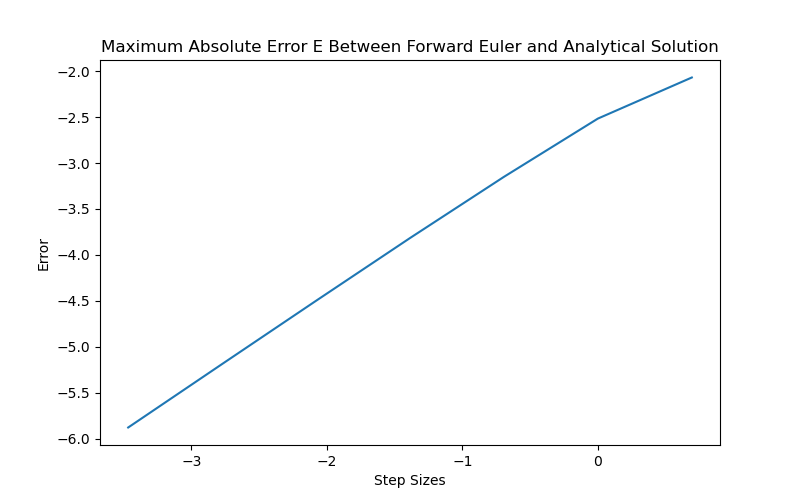

In [30]:
# Problem D

step_sizes = [2,1,1/2,1/4,1/8,1/16,1/32]
i_initial = 0.01
s_initial = 0.99

Beta = 3
Gamma = 2
t_range = 25

errors = []

for step_size in step_sizes:
    errors.append(get_max_error(i_initial, s_initial, Beta, Gamma, t_range, step_size))

plt.figure(1)
fig, axs = plt.subplots(1, figsize=(8, 5))
plt.plot(np.log(step_sizes), np.log(errors))
plt.xlabel("Step Sizes")
plt.ylabel("Error")
plt.title("Maximum Absolute Error E Between Forward Euler and Analytical Solution")
plt.show()